# UTSA CS 3793/5233: Assignment-4

Summer 2021


**Frank - Tyler - (zaf455)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [ ]:
# import all required libraries
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from pylab import rcParams
from tensorflow.keras.models import load_model

# google drive to save model
from google.colab import drive
drive.mount('/content/drive')
import os.path




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
# Load the data - training as well as testing
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()


# convert to values between 0-1
x_test = x_test/255.0
x_train = x_train/255.0
print(x_train.shape)
print(x_test.shape)
# Prepare the data that can be used by the next step - creating and training the DL model
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']

# print(y_train.dtype) #-debug
# print(x_train[0])#-debug


(50000, 32, 32, 3)
(10000, 32, 32, 3)


indicies of unique values
[  2   4 202 342 102 285  55 178  16  53 244   3 179 240  51  72 573  13
  75   0  57  34  35   8  38 241 150  68   7   1 133   9 121  67 120  65
  60 212  83  10 144 211  28  63 177  41  77  32 152  42  71  64  27  69
 167  61  44 270 378  21 300 104 141 143  26  33  86 125 116  93  22  14
  62  50  20  82  45  87  40 157  18  36  12  66  25 162   5  23 124  48
   6 313  70  99 112  94  11  17  58  97]


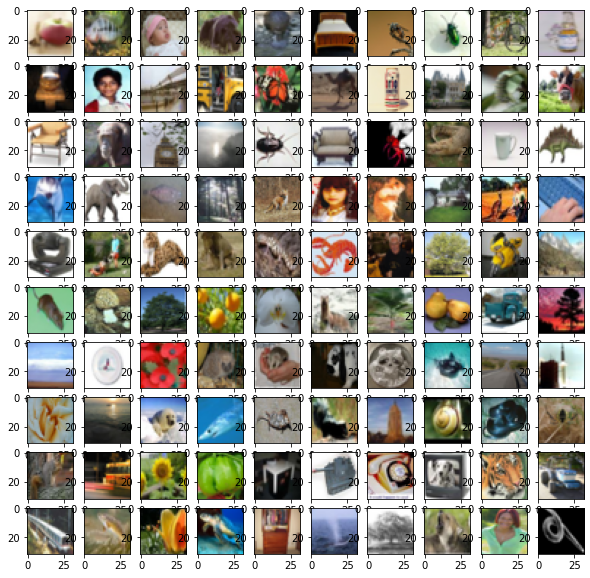

In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total
# print(np.unique(y_train))
test = np.unique(y_train, return_index=True)
print('indicies of unique values')
print(test[1])
imgs = np.empty(shape=(100,32,32,3))
i = 0
for x in test[1]:
  imgs[i] = x_train[x]

imgs = x_train[2]
i = 1
for x in test[1]:
  imgs = np.append(imgs, x_train[x], axis=0)

# img = np.random.randint(0, len(x_train), 10*10)
rcParams['figure.figsize'] = 10,10
fig, axes = plt.subplots(10, 10)
idx = 0
for i in range(10):
  for j in range (10):
    axes[i,j].imshow(x_train[test[1][idx]])
    idx += 1




## CNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
cifar100_model = keras.Sequential([
                                   keras.layers.Conv2D(filters=32, kernel_size=(3), activation='relu', input_shape=(32,32,3)),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=64, kernel_size=(3), activation='relu'),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Conv2D(filters=64, kernel_size=(3), activation='relu'),
                                   keras.layers.MaxPooling2D(pool_size=(2,2)),
                                   keras.layers.Flatten(),
                                   keras.layers.Dense(128, activation='relu'),
                                   # one node per fine_label class
                                   keras.layers.Dense(100, activation='softmax')
                                   ])

# source: https://keras.io/api/optimizers/sgd/
opt = tf.keras.optimizers.SGD(learning_rate=0.001)
cifar100_model.compile(optimizer=opt,
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])


In [ ]:
# Print the DL model summary
print(cifar100_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"
basePathCNN = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/cifar/cifar100"


In [ ]:
# Train/fit the DL model using the training CIFAR-100 data
# Need to add condition to see if this file exists first?

# # Only load model if it exists
# if os.path.isfile(basePathCNN + '-94.h5'):
#   cifar100_model = load_model(basePathCNN+'-94.h5')

model_history = cifar100_model.fit(x_train, y_train, batch_size=10, epochs=500, shuffle=True)
# cifar100_model.evaluate(x_train, y_train, batch_size=10)
cifar100_model.save(basePathCNN + '.h5')

Epoch 1/500
5000/5000 [==============================] - 13s 3ms/step - loss: 4.6037 - accuracy: 0.0122
Epoch 2/500
5000/5000 [==============================] - 13s 3ms/step - loss: 4.5962 - accuracy: 0.0178
Epoch 3/500
5000/5000 [==============================] - 13s 3ms/step - loss: 4.5793 - accuracy: 0.0224
Epoch 4/500
5000/5000 [==============================] - 14s 3ms/step - loss: 4.5090 - accuracy: 0.0295
Epoch 5/500
5000/5000 [==============================] - 14s 3ms/step - loss: 4.3430 - accuracy: 0.0409
Epoch 6/500
5000/5000 [==============================] - 13s 3ms/step - loss: 4.1997 - accuracy: 0.0604
Epoch 7/500
5000/5000 [==============================] - 13s 3ms/step - loss: 4.0933 - accuracy: 0.0771
Epoch 8/500
5000/5000 [==============================] - 13s 3ms/step - loss: 3.9969 - accuracy: 0.0956
Epoch 9/500
5000/5000 [==============================] - 14s 3ms/step - loss: 3.9139 - accuracy: 0.1063
Epoch 10/500
5000/5000 [==============================] - 14s 3m

dict_keys(['loss', 'accuracy'])


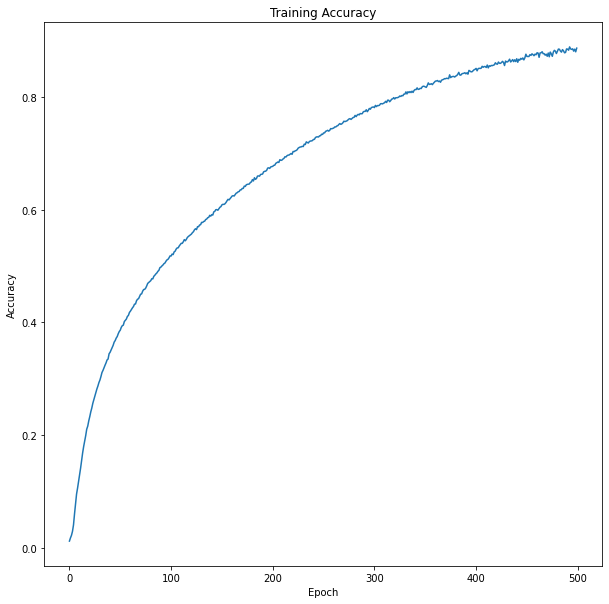

In [ ]:
# Plot the training/validation accuracy and loss
print(model_history.history.keys())#-debug
plt.plot(model_history.history['accuracy'])
# plt.plot(model.history['a'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


Epoch 1/200
5000/5000 [==============================] - 14s 3ms/step - loss: 0.3431 - accuracy: 0.8833
Epoch 2/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3283 - accuracy: 0.8900
Epoch 3/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3162 - accuracy: 0.8936
Epoch 4/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3327 - accuracy: 0.8884
Epoch 5/200
5000/5000 [==============================] - 14s 3ms/step - loss: 0.3311 - accuracy: 0.8861
Epoch 6/200
5000/5000 [==============================] - 14s 3ms/step - loss: 0.3289 - accuracy: 0.8880
Epoch 7/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3353 - accuracy: 0.8872
Epoch 8/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3379 - accuracy: 0.8865
Epoch 9/200
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3056 - accuracy: 0.8980
Epoch 10/200
5000/5000 [==============================] - 14s 3m

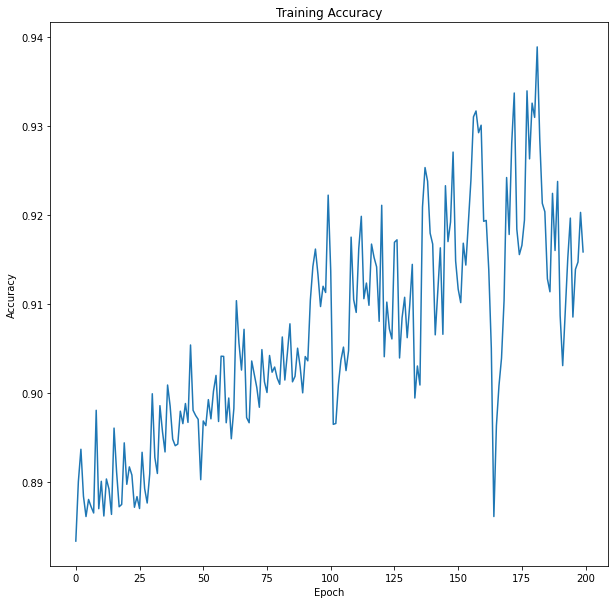

In [ ]:
# Run another 200 epochs
if os.path.isfile(basePathCNN + '.h5'):
  cifar100_model = load_model(basePathCNN+'.h5')

model_history2 = cifar100_model.fit(x_train, y_train, batch_size=10, epochs=200, shuffle=True)
# cifar100_model.evaluate(x_train, y_train, batch_size=10)
cifar100_model.save(basePathCNN + '-2.h5')

print(model_history2.history.keys())#-debug
plt.plot(model_history2.history['accuracy'])
# plt.plot(model.history['a'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [ ]:
# Re-initialize the model




In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"
testing_model = load_model(basePathCNN + '-2.h5')


In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset
history_3 = cifar100_model.evaluate(x_test, y_test, batch_size=10)
history_4 = cifar100_model.evaluate(x_train, y_train, batch_size=10)
# # print(history_3.history.keys())#-debug
# plt.plot(history_3.history['accuracy'])
# # plt.plot(model.history['a'])
# plt.title('Training Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.show()

5000/5000 [==============================] - 9s 2ms/step - loss: 0.2277 - accuracy: 0.9241


## Model Performance - Accuracy (Extra Credit)

(10 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(20 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [ ]:
# Load the Reuters dataset - use the Keras version
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10000, skip_top=20, maxlen=256)
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word
words = keras.datasets.reuters.get_word_index()


557056/550378 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words
# pad with 0 at end of sentence, max length is set to 256 words
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value=0, padding='post', maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value=0, padding='post', maxlen=256)



# verify data looks right
word_to_id = {k:(v+3) for k,v in words.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[0] ))

<UNK> <UNK> <UNK> <UNK> as <UNK> result <UNK> its december acquisition <UNK> space co <UNK> expects earnings per share <UNK> 1987 <UNK> <UNK> 15 <UNK> <UNK> 30 <UNK> per share up from 70 cts <UNK> 1986 <UNK> company <UNK> pretax net should rise <UNK> nine <UNK> 10 <UNK> <UNK> from six <UNK> <UNK> <UNK> 1986 <UNK> rental operation revenues <UNK> 19 <UNK> 22 <UNK> <UNK> from 12 5 <UNK> <UNK> <UNK> <UNK> cash flow per share this year should be 2 50 <UNK> three <UNK> <UNK> <UNK> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [ ]:
# print the first 10 newswires. Source code from Dr. Desai, UTSA CS 5233 Summer 2021
for i in range(0,5):
    print(x_train[i])
    print(' '.join(id_to_word[id] for id in x_train[i] ))
    print("Review Classfication (Topic #, range 1-46) : " + str(y_train[i]) + "\n")

[   2    2    2    2   43    2  447    2   25  207  270    2 3095  111
    2  369  186   90   67    2   89    2    2  102    2    2  124    2
   90   67   84   22  482   26    2   48    2   49    2  864   39  209
  154    2  151    2   83    2    2   22  155    2    2    2   48    2
 4579 1005  504    2  258    2  272    2    2   22  134   44    2    2
    2    2  197 1245   90   67   52   29  209   30   32  132    2  109
    2    2    2    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

## RNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

In [ ]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
RNN_Model = keras.Sequential([
                              # 10000 words in dict
                              keras.layers.Embedding(input_dim=10000, output_dim=64),
                              # keras.layers.SimpleRNN(128, activation='relu'),
                              # LSTM layers
                              keras.layers.LSTM(128, dropout=0.05),
                              #GRU
                              # keras.layers.GRU(64),
                              # For prediction
                              keras.layers.Dense(64, activation='relu'),
                              keras.layers.Dense(46, activation='sigmoid')
                              ])

# source: https://keras.io/api/optimizers/sgd/
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
RNN_Model.compile(optimizer=opt,
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

In [ ]:
# Print the DL model summary
print(RNN_Model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 46)                2990      
Total params: 750,062
Trainable params: 750,062
Non-trainable params: 0
_________________________________________________________________
None


## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
basePathRNN = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/reuters/reuters"


In [ ]:
# Train/fit the DL model using the training Reuters data
model_history = RNN_Model.fit(x_train, y_train, batch_size=10, epochs=100, shuffle=True)
# cifar100_model.evaluate(x_train, y_train, batch_size=10)
RNN_Model.save(basePathRNN + '.h5')


Epoch 1/100
766/766 [==============================] - 14s 17ms/step - loss: 2.3381 - accuracy: 0.3863
Epoch 2/100
766/766 [==============================] - 12s 16ms/step - loss: 2.2993 - accuracy: 0.3905
Epoch 3/100
766/766 [==============================] - 13s 16ms/step - loss: 2.2935 - accuracy: 0.3905
Epoch 4/100
766/766 [==============================] - 13s 17ms/step - loss: 2.2939 - accuracy: 0.3905
Epoch 5/100
766/766 [==============================] - 13s 17ms/step - loss: 2.2915 - accuracy: 0.3905
Epoch 6/100
766/766 [==============================] - 12s 16ms/step - loss: 2.2900 - accuracy: 0.3905
Epoch 7/100
766/766 [==============================] - 12s 16ms/step - loss: 2.2904 - accuracy: 0.3905
Epoch 8/100
766/766 [==============================] - 12s 16ms/step - loss: 2.0904 - accuracy: 0.4115
Epoch 9/100
766/766 [==============================] - 13s 17ms/step - loss: 1.7299 - accuracy: 0.5386
Epoch 10/100
766/766 [==============================] - 13s 17ms/step - l

dict_keys(['loss', 'accuracy'])


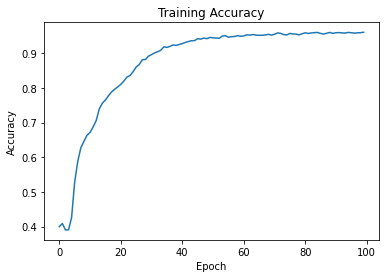

In [ ]:
# Plot the training/validation accuracy and loss
# Plot the training/validation accuracy and loss
print(model_history.history.keys())#-debug
plt.plot(model_history.history['accuracy'])
# plt.plot(model.history['a'])
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [ ]:
# Re-initialize the model



In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
testing_model = load_model(basePathRNN + '.h5')


In [ ]:
# Evaluate the trained DL model on the Reuters test dataset
# history_5 = cifar100_model.evaluate(x_test, y_test, batch_size=10)
# history_6 = cifar100_model.evaluate(x_train, y_train, batch_size=10)

history_5 = RNN_Model.evaluate(x_test, y_test, batch_size=10)
history_6 = RNN_Model.evaluate(x_train, y_train, batch_size=10)

766/766 [==============================] - 4s 5ms/step - loss: 0.0592 - accuracy: 0.9683


# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (20 points) CNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation
    *   (10 points) EXTRA CREDIT - Model Performance - Accuracy
*   Natural Language Processing - RNN
    *   (20 points) Load/Prepare Data
    *   (20 points) RNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation 

